<a href="https://colab.research.google.com/github/pr04/Lanslide-Detection/blob/main/PSPNet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install segmentation_models
!pip install keras-utils

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
import pandas as pd
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.models import Model
from keras.optimizers import Adam
from losses import dice_loss

import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

import segmentation_models as sm

physical_devices = tf.config.experimental.list_physical_devices('GPU')

for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Segmentation Models: using `tf.keras` framework.
Default GPU Device:/device:GPU:0


In [ ]:
# Import the necessary libraries
import numpy as np
from google.colab import drive

In [ ]:
# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path to the .npy file on your Google Drive
data_path = '/content/drive/MyDrive/HR-GLDD/trainX.npy'
data_path1 = '/content/drive/MyDrive/HR-GLDD/valX.npy'
data_path2 = '/content/drive/MyDrive/HR-GLDD/testX.npy'
data_path3 = '/content/drive/MyDrive/HR-GLDD/trainY.npy'
data_path4 = '/content/drive/MyDrive/HR-GLDD/valY.npy'
data_path5 = '/content/drive/MyDrive/HR-GLDD/testY.npy'

# Load the data from the .npy file
X_train = np.load(data_path)
Y_train = np.load(data_path3)
X_val = np.load(data_path1)
Y_val = np.load(data_path4)
X_test = np.load(data_path2)
Y_test = np.load(data_path5)

# Print the shape of the loaded data
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

Mounted at /content/drive
(1119, 128, 128, 4)
(1119, 128, 128, 1)
(284, 128, 128, 4)
(284, 128, 128, 1)
(355, 128, 128, 4)
(355, 128, 128, 1)


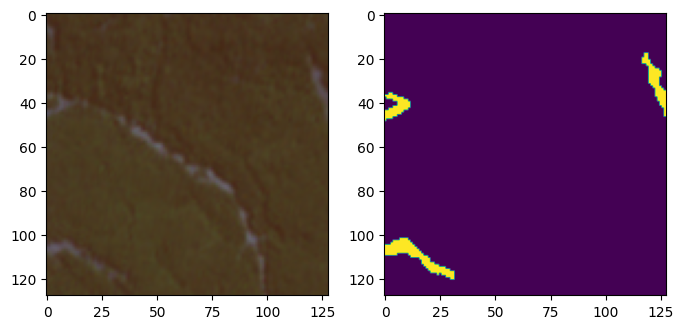

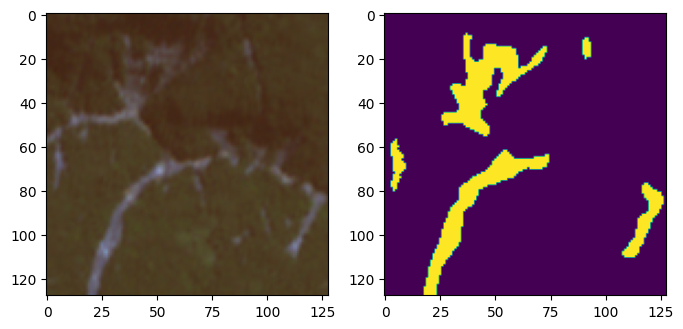

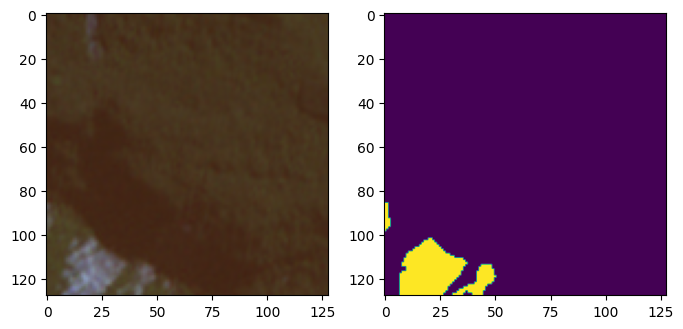

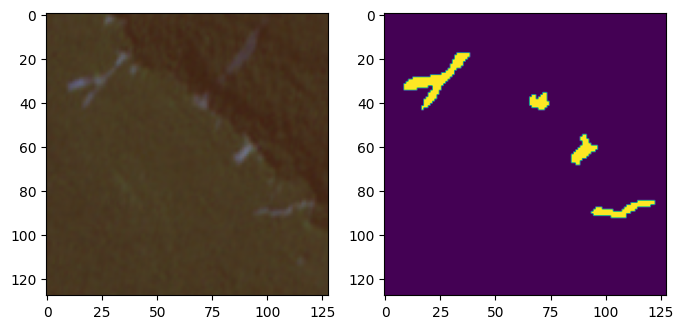

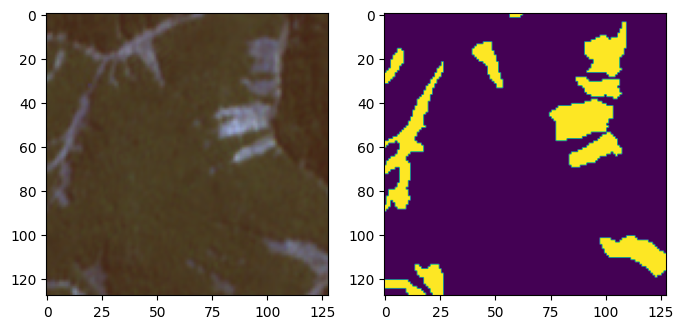

In [ ]:
# Visualize some data
for i in range(5):
    f, axarr = plt.subplots(1, 2, figsize=(8, 8))
    axarr[0].imshow(X_train[i][:, :, :3])
    axarr[1].imshow(np.squeeze(Y_train[i]))

In [ ]:
# Define the evaluation metrics - Precision, Recall, FScore, IoU
metrics = [
    sm.metrics.Precision(threshold=0.5),
    sm.metrics.Recall(threshold=0.5),
    sm.metrics.FScore(threshold=0.5, beta=1),
    sm.metrics.IOUScore(threshold=0.5)
]

_______________________________________________________________________________
Filters:  4
Learning rate:  0.001
Batch size:  4
Epoch 1/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.5374 - f1_score: 0.3356 - iou: 0.1043 - loss: 0.7664 - precision: 0.2641 - recall: 0.8083 - val_accuracy: 0.8838 - val_f1_score: 0.0513 - val_iou: 0.0665 - val_loss: 0.6305 - val_precision: 0.5328 - val_recall: 0.0354
Epoch 2/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9111 - f1_score: 0.5266 - iou: 0.1053 - loss: 0.5945 - precision: 0.6314 - recall: 0.5070 - val_accuracy: 0.8861 - val_f1_score: 0.0133 - val_iou: 0.0649 - val_loss: 0.5533 - val_precision: 0.2840 - val_recall: 0.0080
Epoch 3/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9200 - f1_score: 0.5674 - iou: 0.1152 - loss: 0.5274 - precision: 0.6709 - recall: 0.5498 - val_accuracy: 0.9015 - val_f1_score: 0.3292 - val_iou: 0.0776 - val_loss: 0.5535 - val_precision: 0.6026 - val_recall: 0.3099
Epoch 4/100

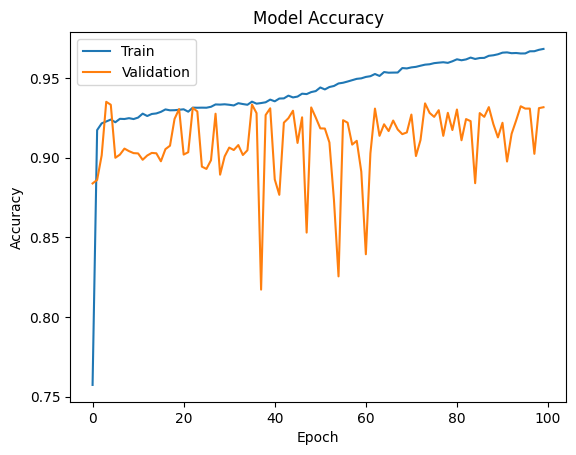

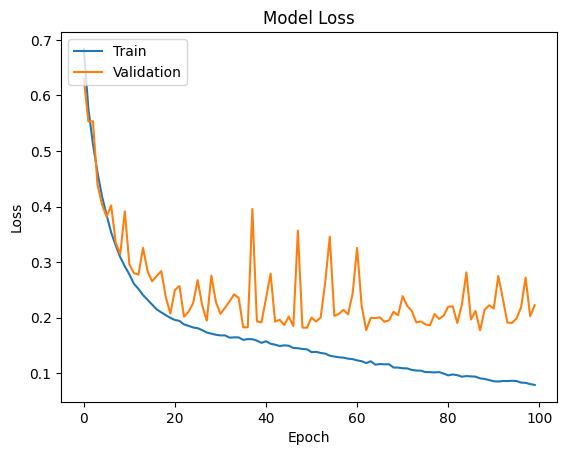

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.9197 - f1_score: 0.6223 - iou: 0.3429 - loss: 0.2015 - precision: 0.7000 - recall: 0.5705
_______________________________________________________________________________
Filters:  4
Learning rate:  0.001
Batch size:  8
Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - accuracy: 0.6972 - f1_score: 0.2967 - iou: 0.0918 - loss: 0.6633 - precision: 0.2311 - recall: 0.5417 - val_accuracy: 0.9241 - val_f1_score: 0.0903 - val_iou: 0.0656 - val_loss: 0.4907 - val_precision: 0.6424 - val_recall: 0.0490
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9090 - f1_score: 0.5992 - iou: 0.1131 - loss: 0.4841 - precision: 0.5706 - recall: 0.6775 - val_accuracy: 0.9164 - val_f1_score: 0.0069 - val_iou: 0.0646 - val_loss: 0.3846 - val_precision: 0.3309 - val_recall: 0.0038
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9209 - f1_score: 0.6363 - iou: 0.1327 - loss: 0.3640 - precision: 0.6041 - recall: 0

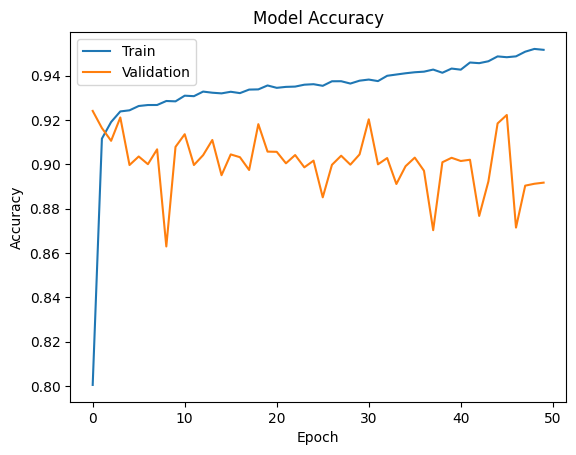

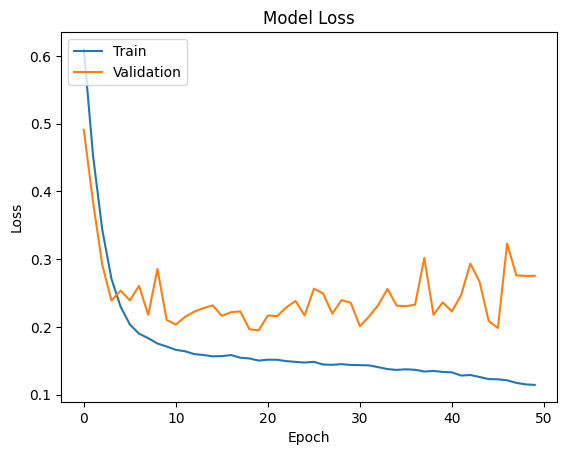

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9195 - f1_score: 0.5929 - iou: 0.2817 - loss: 0.1853 - precision: 0.7383 - recall: 0.5210
_______________________________________________________________________________
Filters:  4
Learning rate:  0.001
Batch size:  16
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 312ms/step - accuracy: 0.8930 - f1_score: 0.0000e+00 - iou: 0.0743 - loss: 0.4208 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9205 - val_f1_score: 0.0000e+00 - val_iou: 0.0637 - val_loss: 0.4305 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.8995 - f1_score: 0.0000e+00 - iou: 0.1039 - loss: 0.3044 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9205 - val_f1_score: 0.0000e+00 - val_iou: 0.0524 - val_loss: 0.2890 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8933 - f1_score: 0.0000e+00 - iou: 0.140

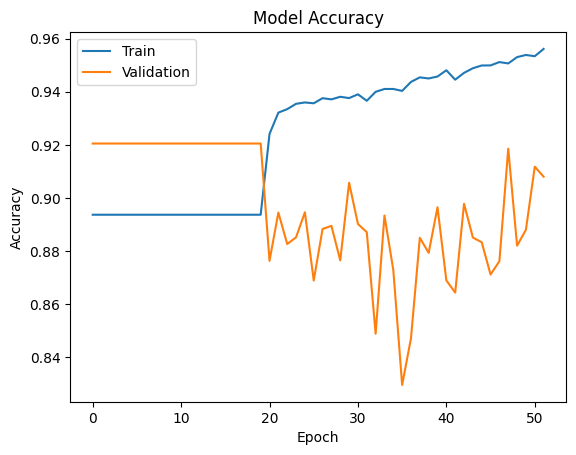

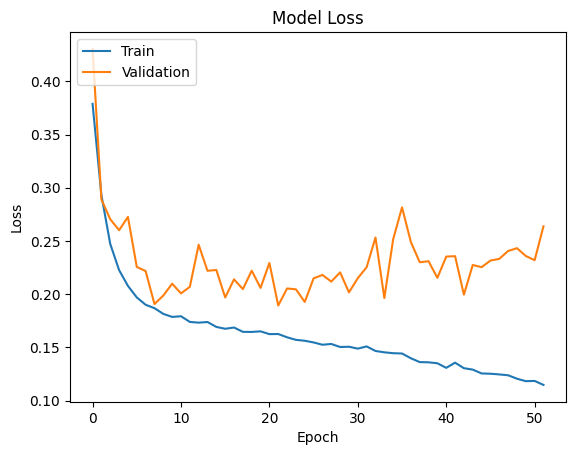

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.9199 - f1_score: 0.6316 - iou: 0.2529 - loss: 0.1877 - precision: 0.6815 - recall: 0.5991
_______________________________________________________________________________
Filters:  4
Learning rate:  0.001
Batch size:  32
Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 43s 654ms/step - accuracy: 0.6965 - f1_score: 0.3407 - iou: 0.1143 - loss: 0.7080 - precision: 0.2297 - recall: 0.7145 - val_accuracy: 0.8769 - val_f1_score: 0.2063 - val_iou: 0.0674 - val_loss: 0.7251 - val_precision: 0.3192 - val_recall: 0.1684
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8850 - f1_score: 0.5511 - iou: 0.1365 - loss: 0.5253 - precision: 0.4924 - recall: 0.6404 - val_accuracy: 0.8732 - val_f1_score: 0.0419 - val_iou: 0.0647 - val_loss: 0.6646 - val_precision: 0.1797 - val_recall: 0.0266
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9134 - f1_score: 0.6089 - iou: 0.1318 - loss: 0.4780 - precision: 0.5858 - recall: 0.6470

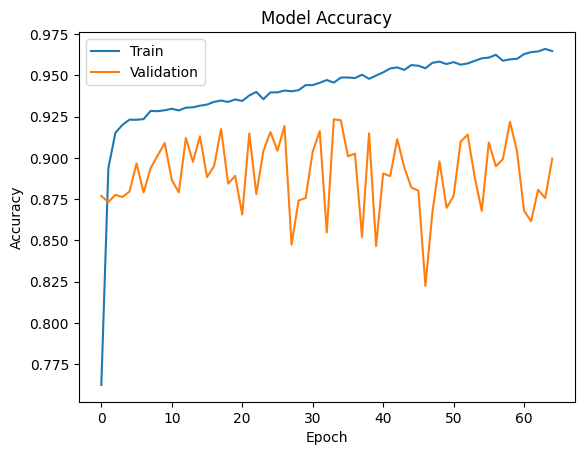

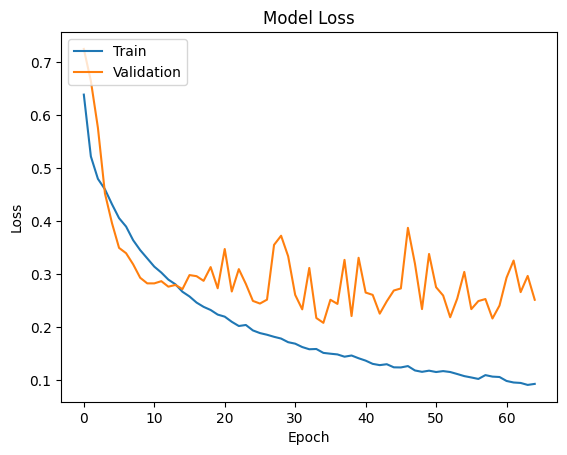

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.9167 - f1_score: 0.5658 - iou: 0.2540 - loss: 0.2101 - precision: 0.7312 - recall: 0.4836
_______________________________________________________________________________
Filters:  4
Learning rate:  0.0005
Batch size:  4
Epoch 1/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 36s 68ms/step - accuracy: 0.7034 - f1_score: 0.3560 - iou: 0.1196 - loss: 0.6595 - precision: 0.2683 - recall: 0.7008 - val_accuracy: 0.8868 - val_f1_score: 0.1079 - val_iou: 0.0662 - val_loss: 0.6157 - val_precision: 0.4650 - val_recall: 0.0813
Epoch 2/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8921 - f1_score: 0.5104 - iou: 0.1331 - loss: 0.4352 - precision: 0.4704 - recall: 0.6676 - val_accuracy: 0.8900 - val_f1_score: 0.4074 - val_iou: 0.1046 - val_loss: 0.4588 - val_precision: 0.5250 - val_recall: 0.4533
Epoch 3/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9166 - f1_score: 0.5978 - iou: 0.1659 - loss: 0.3254 - precision: 0.6201 - recall: 

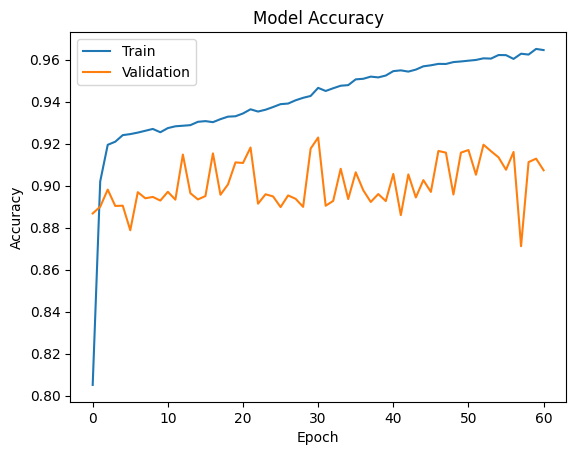

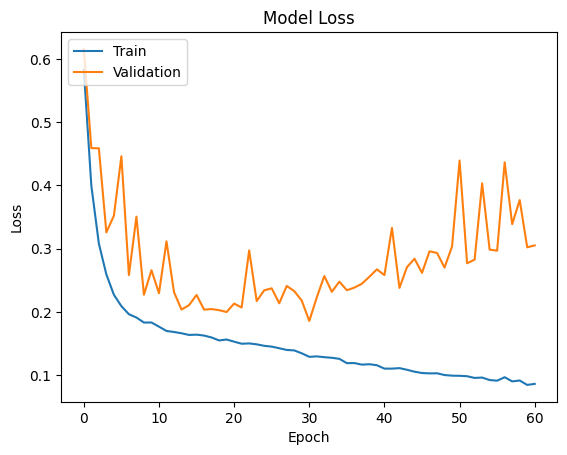

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9205 - f1_score: 0.6614 - iou: 0.3392 - loss: 0.1881 - precision: 0.6780 - recall: 0.6613
_______________________________________________________________________________
Filters:  4
Learning rate:  0.0005
Batch size:  8
Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 116ms/step - accuracy: 0.4738 - f1_score: 0.2434 - iou: 0.1057 - loss: 0.7090 - precision: 0.1523 - recall: 0.7394 - val_accuracy: 0.8903 - val_f1_score: 0.1784 - val_iou: 0.0733 - val_loss: 0.5569 - val_precision: 0.5930 - val_recall: 0.1326
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8214 - f1_score: 0.4708 - iou: 0.1195 - loss: 0.5787 - precision: 0.3577 - recall: 0.7495 - val_accuracy: 0.9031 - val_f1_score: 0.3233 - val_iou: 0.0778 - val_loss: 0.5585 - val_precision: 0.6430 - val_recall: 0.2785
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9065 - f1_score: 0.5739 - iou: 0.1180 - loss: 0.5247 - precision: 0.5520 - recall:

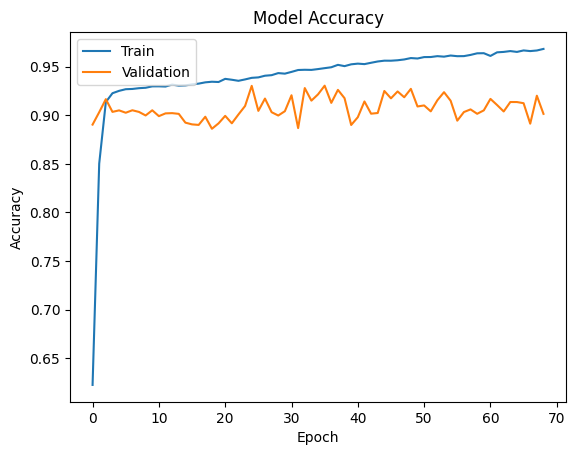

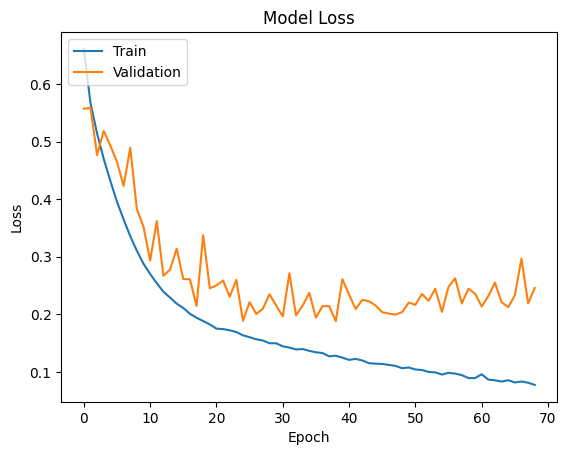

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.9219 - f1_score: 0.6392 - iou: 0.3253 - loss: 0.1984 - precision: 0.6930 - recall: 0.6122
_______________________________________________________________________________
Filters:  4
Learning rate:  0.0005
Batch size:  16
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 234ms/step - accuracy: 0.7620 - f1_score: 0.3139 - iou: 0.1025 - loss: 0.5509 - precision: 0.2313 - recall: 0.5219 - val_accuracy: 0.9171 - val_f1_score: 0.0013 - val_iou: 0.0651 - val_loss: 0.5701 - val_precision: 0.1860 - val_recall: 7.0463e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.8687 - f1_score: 0.5214 - iou: 0.1360 - loss: 0.4364 - precision: 0.4220 - recall: 0.7270 - val_accuracy: 0.9205 - val_f1_score: 4.4017e-06 - val_iou: 0.0611 - val_loss: 0.4563 - val_precision: 0.0714 - val_recall: 2.2009e-06
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8985 - f1_score: 0.6233 - iou: 0.1609 - loss: 0.3799 - precision: 0.5336 - 

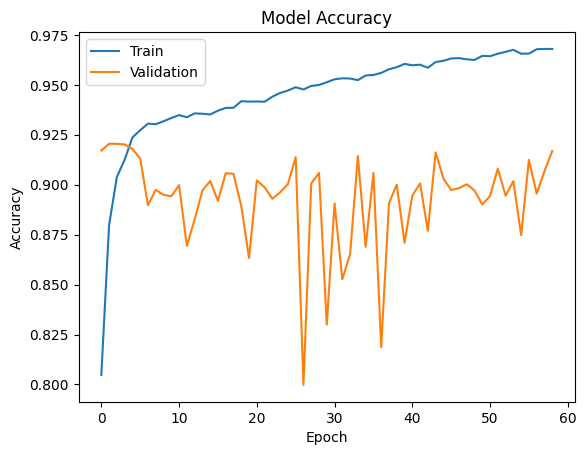

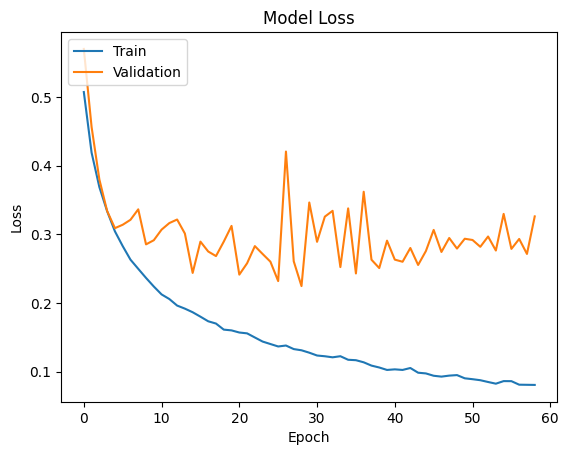

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9156 - f1_score: 0.5841 - iou: 0.2893 - loss: 0.2034 - precision: 0.7102 - recall: 0.5219
_______________________________________________________________________________
Filters:  4
Learning rate:  0.0005
Batch size:  32
Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 467ms/step - accuracy: 0.7279 - f1_score: 0.2862 - iou: 0.0931 - loss: 0.5938 - precision: 0.1986 - recall: 0.5233 - val_accuracy: 0.9181 - val_f1_score: 0.0076 - val_iou: 0.0671 - val_loss: 0.6372 - val_precision: 0.2131 - val_recall: 0.0039
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8192 - f1_score: 0.4588 - iou: 0.1178 - loss: 0.4935 - precision: 0.3377 - recall: 0.7327 - val_accuracy: 0.9190 - val_f1_score: 0.0018 - val_iou: 0.0659 - val_loss: 0.5757 - val_precision: 0.2876 - val_recall: 9.3139e-04
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8553 - f1_score: 0.5136 - iou: 0.1280 - loss: 0.4573 - precision: 0.4067 - recall: 0

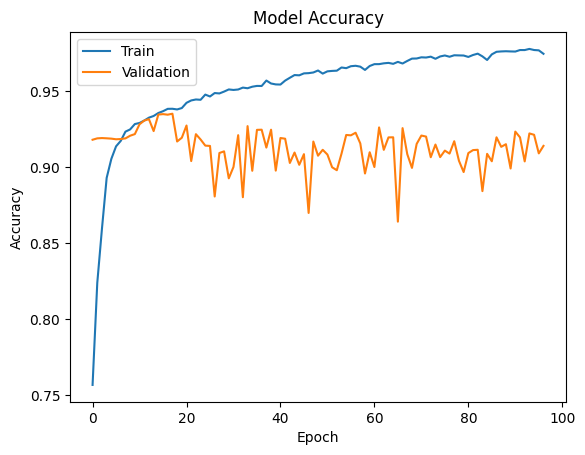

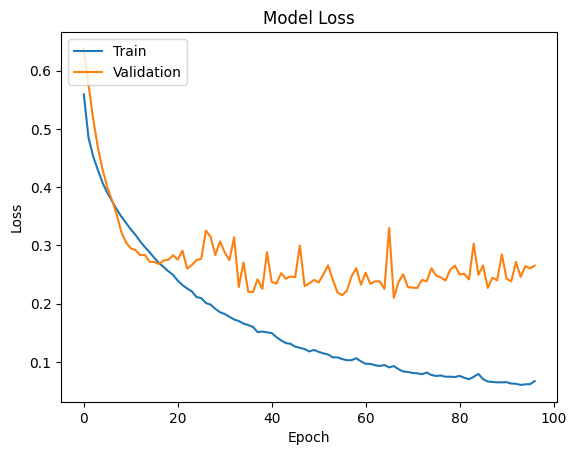

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.9217 - f1_score: 0.6201 - iou: 0.3043 - loss: 0.2197 - precision: 0.7268 - recall: 0.5602
_______________________________________________________________________________
Filters:  4
Learning rate:  0.0001
Batch size:  4
Epoch 1/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 33s 62ms/step - accuracy: 0.5908 - f1_score: 0.2723 - iou: 0.1027 - loss: 0.7039 - precision: 0.1785 - recall: 0.7447 - val_accuracy: 0.8984 - val_f1_score: 0.0620 - val_iou: 0.0689 - val_loss: 0.6069 - val_precision: 0.1523 - val_recall: 0.0443
Epoch 2/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8415 - f1_score: 0.4697 - iou: 0.1252 - loss: 0.5236 - precision: 0.3725 - recall: 0.7204 - val_accuracy: 0.8724 - val_f1_score: 0.3395 - val_iou: 0.0817 - val_loss: 0.5083 - val_precision: 0.3986 - val_recall: 0.4116
Epoch 3/100
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8820 - f1_score: 0.5235 - iou: 0.1301 - loss: 0.4567 - precision: 0.4549 - recall: 0

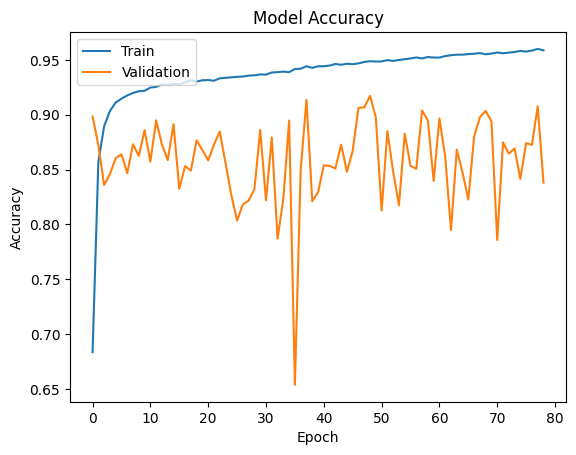

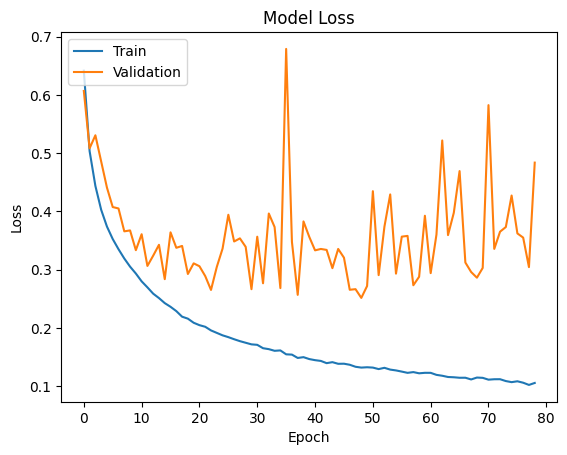

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.9168 - f1_score: 0.5736 - iou: 0.2821 - loss: 0.2151 - precision: 0.7405 - recall: 0.4816
_______________________________________________________________________________
Filters:  4
Learning rate:  0.0001
Batch size:  8
Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 34s 122ms/step - accuracy: 0.5345 - f1_score: 0.2159 - iou: 0.0991 - loss: 0.6893 - precision: 0.1361 - recall: 0.5687 - val_accuracy: 0.1209 - val_f1_score: 0.1462 - val_iou: 0.0708 - val_loss: 0.7696 - val_precision: 0.0801 - val_recall: 0.9591
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7274 - f1_score: 0.2364 - iou: 0.0918 - loss: 0.6044 - precision: 0.1749 - recall: 0.4122 - val_accuracy: 0.8004 - val_f1_score: 0.2119 - val_iou: 0.0729 - val_loss: 0.6037 - val_precision: 0.1814 - val_recall: 0.3665
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8128 - f1_score: 0.2658 - iou: 0.0895 - loss: 0.5387 - precision: 0.2268 - recall: 

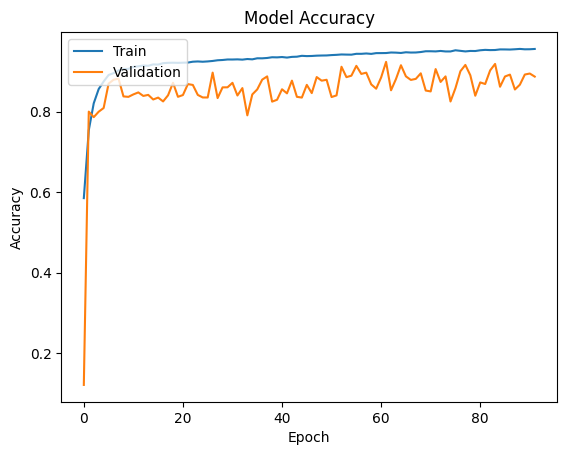

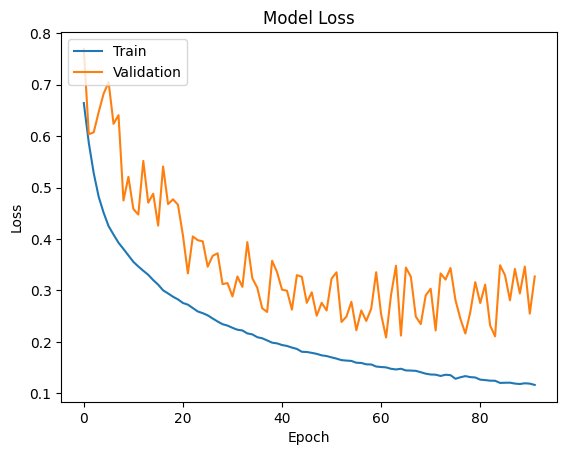

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.9123 - f1_score: 0.5339 - iou: 0.2311 - loss: 0.2287 - precision: 0.7175 - recall: 0.4361


In [ ]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, BatchNormalization, Activation, AveragePooling2D, Concatenate
from keras.models import Model
from keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow.keras.backend as K

# Size of the tiles
size = X_train.shape[2]
# Image bands
img_bands = X_train.shape[3]
# Sampling method
sampling = "no_overlap"
# Loss function
loss = dice_loss

# Number of filters
filters = [4, 8, 16, 32]
# Learning rates
lr = [1e-3, 5e-4, 1e-4, 5e-5, 1e-5]
# Batch sizes
batch_size = [4, 8, 16, 32]
# Epochs
epochs = 100

# Dictionary that will save the results
dic = {}

# Hyperparameters
dic["model"] = []
dic["batch_size"] = []
dic["learning_rate"] = []
dic["filters"] = []


dic["precision_area"] = []
dic["recall_area"] = []
dic["f1_score_area"] = []
dic["iou_score_area"] = []

# Counter to track the number of runs
run_count = 0
max_runs = 10
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * ((prec * rec) / (prec + rec + K.epsilon()))

def iou(y_true, y_pred):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=[1,2,3])
    jac = (intersection + 1e-15) / (sum_ - intersection + 1e-15)
    return K.mean(jac, axis=0)

# Loop over all the filters in the filter list
for fiilter in filters:
    # Loop over the learning rates
    for learning_rate in lr:
        # Loop over all batch sizes in batch_size list
        for batch in batch_size:
            if run_count >= max_runs:
                break
            print('_______________________________________________________________________________')
            print('Filters: ', fiilter)
            print('Learning rate: ', learning_rate)
            print('Batch size: ', batch)


            def pyramid_pooling_block(input_tensor, bin_sizes):
                concat_list = [input_tensor]
                w = input_tensor.shape[1]
                h = input_tensor.shape[2]
                for bin_size in bin_sizes:
                    x = AveragePooling2D(pool_size=(w // bin_size, h // bin_size), strides=(w // bin_size, h // bin_size))(input_tensor)
                    x = Conv2D(512, 1, padding='same')(x)
                    x = BatchNormalization()(x)
                    x = Activation('relu')(x)
                    x = UpSampling2D(size=(w // x.shape[1], h // x.shape[2]), interpolation='bilinear')(x)
                    concat_list.append(x)
                return Concatenate()(concat_list)

            def pspnet(lr, input_size=(size, size, img_bands), pretrained_weights=None, filtersFirstLayer=64):
                inputs = Input(input_size)

                # Encoder
                conv1 = Conv2D(filtersFirstLayer, 3, padding='same')(inputs)
                conv1 = BatchNormalization()(conv1)
                conv1 = Activation('relu')(conv1)
                conv1 = Conv2D(filtersFirstLayer, 3, padding='same')(conv1)
                conv1 = BatchNormalization()(conv1)
                conv1 = Activation('relu')(conv1)
                pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

                conv2 = Conv2D(filtersFirstLayer * 2, 3, padding='same')(pool1)
                conv2 = BatchNormalization()(conv2)
                conv2 = Activation('relu')(conv2)
                conv2 = Conv2D(filtersFirstLayer * 2, 3, padding='same')(conv2)
                conv2 = BatchNormalization()(conv2)
                conv2 = Activation('relu')(conv2)
                pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

                conv3 = Conv2D(filtersFirstLayer * 4, 3, padding='same')(pool2)
                conv3 = BatchNormalization()(conv3)
                conv3 = Activation('relu')(conv3)
                conv3 = Conv2D(filtersFirstLayer * 4, 3, padding='same')(conv3)
                conv3 = BatchNormalization()(conv3)
                conv3 = Activation('relu')(conv3)
                pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

                conv4 = Conv2D(filtersFirstLayer * 8, 3, padding='same')(pool3)
                conv4 = BatchNormalization()(conv4)
                conv4 = Activation('relu')(conv4)
                conv4 = Conv2D(filtersFirstLayer * 8, 3, padding='same')(conv4)
                conv4 = BatchNormalization()(conv4)
                conv4 = Activation('relu')(conv4)
                pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

                conv5 = Conv2D(filtersFirstLayer * 16, 3, padding='same')(pool4)
                conv5 = BatchNormalization()(conv5)
                conv5 = Activation('relu')(conv5)

                # Pyramid Pooling Module
                psp = pyramid_pooling_block(conv5, [1, 2, 3, 6])

                # Decoder
                up6 = UpSampling2D(size=(2, 2))(psp)
                up6 = Conv2D(filtersFirstLayer * 8, 3, padding='same')(up6)
                up6 = BatchNormalization()(up6)
                up6 = Activation('relu')(up6)
                merge6 = concatenate([conv4, up6], axis=3)

                up7 = UpSampling2D(size=(2, 2))(merge6)
                up7 = Conv2D(filtersFirstLayer * 4, 3, padding='same')(up7)
                up7 = BatchNormalization()(up7)
                up7 = Activation('relu')(up7)
                merge7 = concatenate([conv3, up7], axis=3)

                up8 = UpSampling2D(size=(2, 2))(merge7)
                up8 = Conv2D(filtersFirstLayer * 2, 3, padding='same')(up8)
                up8 = BatchNormalization()(up8)
                up8 = Activation('relu')(up8)
                merge8 = concatenate([conv2, up8], axis=3)

                up9 = UpSampling2D(size=(2, 2))(merge8)
                up9 = Conv2D(filtersFirstLayer, 3, padding='same')(up9)
                up9 = BatchNormalization()(up9)
                up9 = Activation('relu')(up9)
                merge9 = concatenate([conv1, up9], axis=3)

                conv9 = Conv2D(filtersFirstLayer, 3, padding='same')(merge9)
                conv9 = BatchNormalization()(conv9)
                conv9 = Activation('relu')(conv9)
                conv9 = Conv2D(filtersFirstLayer, 3, padding='same')(conv9)
                conv9 = BatchNormalization()(conv9)
                conv9 = Activation('relu')(conv9)

                conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

                model = Model(inputs, conv10)

                model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy', precision, recall, f1_score, iou])

                if pretrained_weights:
                    model.load_weights(pretrained_weights)

                return model


            # Load the model
            model = pspnet(filtersFirstLayer=fiilter, lr=learning_rate, input_size=(size, size, img_bands))
            # Stop the training if the validation loss does not decrease after 30 epochs
            early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',  # what is the metric to measure
                                                       patience=30,  # how many epochs to continue running the model after seeing an increase in val_loss
                                                       restore_best_weights=True)  # update the model
            # Save the models only when validation loss decreases
            model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                f'data/model/pspnet/weights/pspnet_{sampling}_size_{size}_filters_{fiilter}_batch_size_{batch}_lr_{learning_rate}.weights.h5',
                monitor='val_loss', mode='min', verbose=0, save_best_only=True, save_weights_only=True)
            # Fit the model 20% of the dataset was used as validation
            history = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs, validation_split=0.2,
                                callbacks=[model_checkpoint, early_stop], verbose=1)

            # Summarize history for accuracy
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('Model Accuracy')
            plt.ylabel('Accuracy')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validation'], loc='upper left')
            # Save plots

            # Create the directory structure if it doesn't already exist
            os.makedirs("data/model/pspnet/plots/results", exist_ok=True)

            plt.savefig(f"data/model/pspnet/plots/pspnet_{sampling}_size_{size}_filters_{fiilter}_batch_size_{batch}_lr_{learning_rate}_accuracy.png")
            plt.show()
            # Summarize history for loss
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model Loss')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validation'], loc='upper left')
            plt.savefig(f"data/model/pspnet/plots/pspnet_{sampling}_size_{size}_filters_{fiilter}_batch_size_{batch}_lr_{learning_rate}_val_loss.png")
            plt.show()

            # Load PSPNet to evaluate the test data
            psp_model = pspnet(filtersFirstLayer=fiilter, lr=learning_rate, input_size=(size, size, img_bands))
            # Load the last saved weight from the training
            psp_model.load_weights(
                f"data/model/pspnet/weights/pspnet_{sampling}_size_{size}_filters_{fiilter}_batch_size_{batch}_lr_{learning_rate}.weights.h5")

            # Evaluate the model
            res_1 = psp_model.evaluate(X_test, Y_test)

            # Save results in the dictionary
            dic["model"].append("PSPNet")
            dic["batch_size"].append(batch)
            dic["learning_rate"].append(learning_rate)
            dic["filters"].append(fiilter)
            dic["precision_area"].append(res_1[2])
            dic["recall_area"].append(res_1[3])
            dic["f1_score_area"].append(res_1[4])
            dic["iou_score_area"].append(res_1[5])

            # Convert results to a dataframe
            results = pd.DataFrame(dic)
            # Export as csv
            results.to_csv(f'data/model/pspnet/results/results_PSPNet.csv', index=False)

            # Increment the run counter
            run_count += 1

        if run_count >= max_runs:
            break
    if run_count >= max_runs:
        break


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    'data/model/pspnet/results/best_model.keras',       # Path to save the model
    monitor='val_loss',                 # Metric to monitor
    mode='min',                         # Mode for monitoring (minimizing val_loss)
    save_best_only=True,                 # Save only the best model
    verbose=1                           # Verbosity
)

# Train the model with the callback
history = model.fit(
    X_train, Y_train,
    batch_size=batch,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[model_checkpoint],
    verbose=1
)


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9497 - f1_score: 0.7481 - iou: 0.2981 - loss: 0.1426 - precision: 0.7736 - recall: 0.7315
Epoch 1: val_loss improved from inf to 0.26885, saving model to data/model/pspnet/results/best_model.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - accuracy: 0.9497 - f1_score: 0.7482 - iou: 0.2982 - loss: 0.1425 - precision: 0.7735 - recall: 0.7318 - val_accuracy: 0.8696 - val_f1_score: 0.4269 - val_iou: 0.1773 - val_loss: 0.2688 - val_precision: 0.4392 - val_recall: 0.5100
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9524 - f1_score: 0.7677 - iou: 0.3115 - loss: 0.1376 - precision: 0.7942 - recall: 0.7507
Epoch 2: val_loss did not improve from 0.26885
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9524 - f1_score: 0.7676 - iou: 0.3114 - loss: 0.1377 - precision: 0.7939 - recall: 0.7507 - val_accuracy: 0.8773 - val_f1_score: 0.4352 - val_iou: 0.1805 - val_loss: 0.2874 - val_precision: 0.4433 - val_r

In [ ]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('data/model/pspnet/results/best_model.keras', custom_objects={
    'precision': precision,
    'recall': recall,
    'f1_score': f1_score,
    'iou': iou
})

# Evaluate the model on the test set
loss, accuracy, precision, recall, f1, iou = best_model.evaluate(X_test, Y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1 Score: {f1}")
print(f"Test IoU Score: {iou}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9167 - f1_score: 0.6031 - iou: 0.2916 - loss: 0.2202 - precision: 0.7008 - recall: 0.5397
Test Loss: 0.2219352126121521
Test Accuracy: 0.9156729578971863
Test Precision: 0.665199875831604
Test Recall: 0.5024155974388123
Test F1 Score: 0.5508635640144348
Test IoU Score: 0.26418745517730713


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Confusion Matrix:
[[5068005  113194]
 [ 359384  275737]]


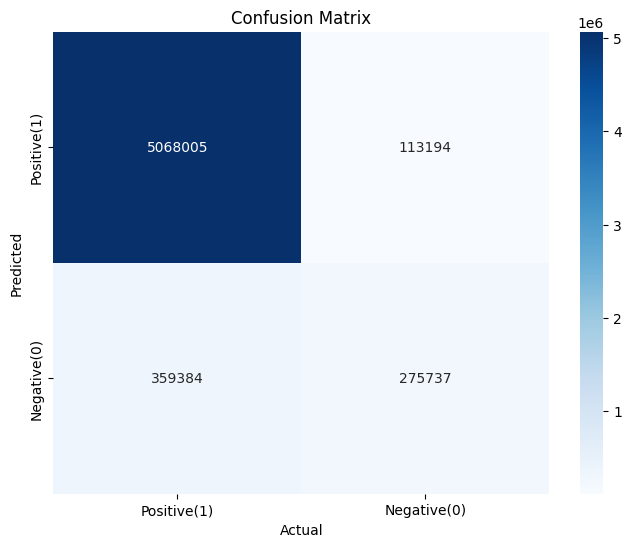

In [ ]:
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_prob = psp_model.predict(X_test)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(np.uint8)  # Convert probabilities to binary labels

# Flatten the arrays to calculate the confusion matrix
y_test_flat = Y_test.flatten()
y_pred_flat = y_pred.flatten()

# Calculate the confusion matrix
conf_matrix = metrics.confusion_matrix(y_test_flat, y_pred_flat)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive(1)', 'Negative(0)'], yticklabels=['Positive(1)', 'Negative(0)'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
'''
pspnet_best = pspnet(filtersFirstLayer= 4,lr = 0.001,input_size=(size,size,img_bands))
pspnet_best.load_weights("data/model/pspnet/weights/pspnet_no_overlap_size_128_filters_4_batch_size_8_lr_0.001.hdf5")

# Plot predictions on test set
for i in range(X_test.shape[0]):
    preds_train_1 = pspnet_best.predict(np.expand_dims(X_test[i],axis = 0), verbose=0)
    preds_train_t1 = (preds_train_1 > 0.5).astype(np.uint8)
    f, axarr = plt.subplots(1,3,figsize=(10,10))
    axarr[0].imshow(X_test[i][:,:,:3])
    axarr[1].imshow(np.squeeze(preds_train_t1))
    axarr[2].imshow(np.squeeze(Y_test[i]))
'''